In [2]:
import sys 
sys.path.append('../')

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
%load_ext autoreload
%autoreload 2
from relation import Distribution

In [6]:
dis = Distribution('x',10,'140','')

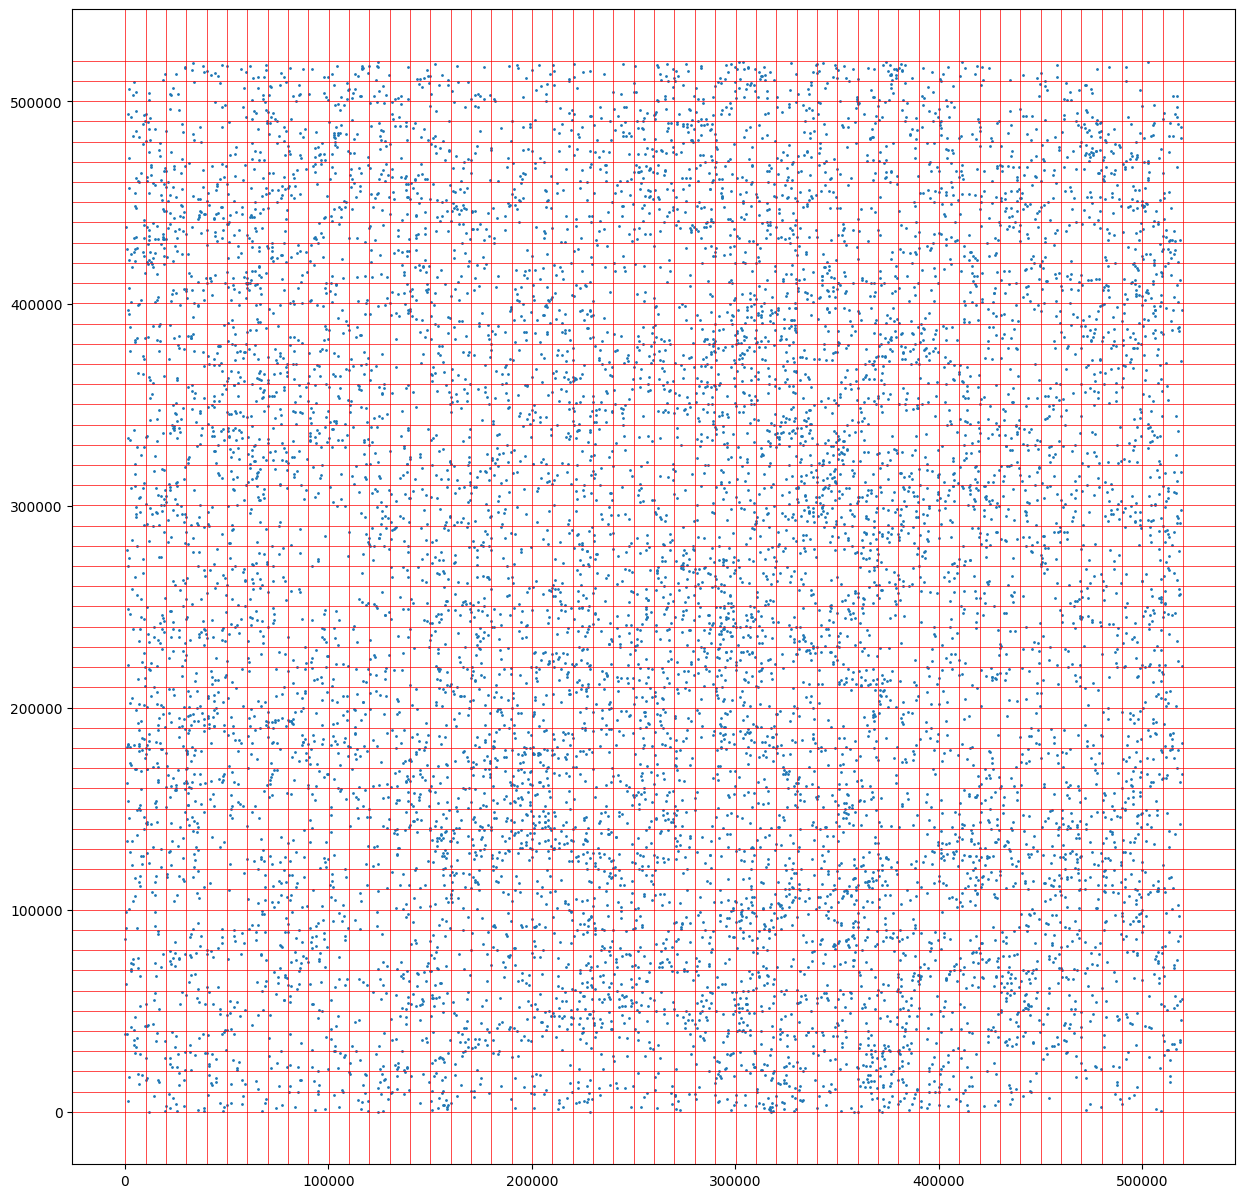

In [7]:
dis.plot()

In [8]:
dis.dataframe

,UID,x[kpc/h],y[kpc/h],z[kpc/h],x_pix,y_pix,i_sector,m500c[Msol/h],r500c[kpc/h],gas_frac,star_frac,T[kev],Lx[1e44erg/s],Y500c,M_sat/M_cD,cshift[kpc],vx[km/s],vy[km/s],vz[km/s]
0,0,208707.3800,203892.310,349705.0300,9714,6893,6,1.032820e+15,1239.470,0.122792,0.028623,9.044580,23.543500,97.814776,0.025279,0.0,-191.69500,-64.8527,-197.449
1,1,314110.3100,24347.102,278058.4400,14620,15250,15,6.263050e+14,1049.090,0.116260,0.029199,6.373800,10.728500,55.243653,0.092982,0.0,-329.93000,45.8412,-256.902
2,2,83776.2580,206510.050,144915.3100,3899,6771,4,7.927850e+14,1134.840,0.121408,0.022461,8.076030,20.825900,79.072321,0.121626,0.0,5.47274,-169.6530,-124.361
3,3,183729.8300,193320.660,332756.0000,8551,7385,6,1.800290e+14,692.373,0.112743,0.026307,3.430610,1.339410,19.028983,0.706301,0.0,852.81600,639.8620,-434.947
4,4,327315.4100,233257.000,209403.9500,15235,5526,7,6.558460e+14,1065.330,0.114432,0.027987,6.241970,9.534250,54.074508,0.060787,0.0,17.03470,259.9550,-111.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10488,15109,245532.7300,47902.445,327681.7500,11428,14154,14,7.078800e+12,235.432,0.071753,0.027462,0.279663,0.011799,0.335735,0.557929,0.0,11.14620,-415.8640,-76.752
10489,15124,93769.9140,81091.062,252886.4400,4364,12609,13,7.258270e+12,237.408,0.064047,0.031599,0.330750,0.010331,0.357384,0.236394,0.0,35.06560,223.1580,-216.831
10490,15297,165208.6700,66284.719,57955.0550,7689,13298,13,7.186580e+12,236.624,0.051829,0.034700,0.393374,0.006633,0.342830,0.589790,0.0,-96.62210,111.1270,147.111
10491,15831,65617.1250,153918.000,3217.6663,3054,9219,8,7.527190e+12,240.301,0.078434,0.023595,0.315919,0.013869,0.423153,0.464481,0.0,-212.09800,247.3330,557.996


In [9]:
dis.position

array([[308100.64954237, 463699.89666371, 123673.24771184, ...,
        243886.43342191,  96866.14260407,  14024.55904931],
       [300992.48597579,  35941.98700915, 304856.87924417, ...,
         97851.66666667, 227218.77767936,  77204.75937408],
       [516245.98464718, 410478.94892235, 213928.71272513, ...,
         85555.1446708 ,   4750.02406259, 423923.78210806]])

In [11]:
pos = {'x':dis.position[0],'y':dis.position[1],'z':dis.position[2]}

In [16]:
data = pd.DataFrame.from_dict(pos)

In [17]:
min_x, max_x = data['x'].min(), data['x'].max()
min_y, max_y = data['y'].min(), data['y'].max()
min_z, max_z = data['z'].min(), data['z'].max()

In [22]:
cube_size = dis.grid.value

In [24]:
num_cubes_x = int(np.ceil((max_x - min_x) / cube_size))
num_cubes_y = int(np.ceil((max_y - min_y) / cube_size))
num_cubes_z = int(np.ceil((max_z - min_z) / cube_size))

In [25]:
data['cube_x'] = np.floor((data['x'] - min_x) / cube_size).astype(int)
data['cube_y'] = np.floor((data['y'] - min_y) / cube_size).astype(int)
data['cube_z'] = np.floor((data['z'] - min_z) / cube_size).astype(int)

In [29]:
data['cube_id'] = (data['cube_x'] * num_cubes_y * num_cubes_z +
                       data['cube_y'] * num_cubes_z +
                       data['cube_z'])


In [30]:
 number_density = data.groupby('cube_id').size().reset_index(name='number_density')

In [32]:
 data = data.merge(number_density, on='cube_id', how='left')

In [33]:
data

,x,y,z,cube_x,cube_y,cube_z,cube_id,number_density
0,308100.649542,300992.485976,516245.984647,30,30,51,82731,2
1,463699.896664,35941.987009,410478.948922,46,3,41,124581,1
2,123673.247712,304856.879244,213928.712725,12,30,21,34029,1
3,271227.974609,285386.271036,491225.273103,27,28,49,74513,1
4,483193.696487,344341.600236,309128.948922,48,34,30,131590,2
...,...,...,...,...,...,...,...,...
10488,362463.433717,70715.153528,483734.499557,36,7,48,97756,1
10489,138426.209035,119709.273694,373319.220549,13,11,37,35761,1
10490,243886.433422,97851.666667,85555.144671,24,9,8,65372,1
10491,96866.142604,227218.777679,4750.024063,9,22,0,25480,2


In [5]:
dis.cube_density()

Calculating cluster and galaxy densities: 100%|██████████| 10493/10493 [00:00<00:00, 191397.21plane of cubes/s]


In [6]:
dis.dataframe

,UID,x[kpc/h],y[kpc/h],z[kpc/h],x_pix,y_pix,i_sector,m500c[Msol/h],r500c[kpc/h],gas_frac,...,M_sat/M_cD,cshift[kpc],vx[km/s],vy[km/s],vz[km/s],cube,mass_c_dens,no_c_dens,mass_g_dens,no_g_dens
0,0,208707.3800,203892.310,349705.0300,9714,6893,6,1.032820e+15,1239.470,0.122792,...,0.025279,0.0,-191.69500,-64.8527,-197.449,303051,25.189722,1.702768,4.511916,59.237145
1,1,314110.3100,24347.102,278058.4400,14620,15250,15,6.263050e+14,1049.090,0.116260,...,0.092982,0.0,-329.93000,45.8412,-256.902,46341,0.000000,0.000000,0.979278,1.572668
2,2,83776.2580,206510.050,144915.3100,3899,6771,4,7.927850e+14,1134.840,0.121408,...,0.121626,0.0,5.47274,-169.6530,-124.361,123021,36.305859,0.851384,3.557478,41.151468
3,3,183729.8300,193320.660,332756.0000,8551,7385,6,1.800290e+14,692.373,0.112743,...,0.706301,0.0,852.81600,639.8620,-434.947,272849,8.244489,0.851384,3.184021,40.627246
4,4,327315.4100,233257.000,209403.9500,15235,5526,7,6.558460e+14,1065.330,0.114432,...,0.060787,0.0,17.03470,259.9550,-111.475,483430,15.251971,1.702768,3.821488,40.889357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10488,15109,245532.7300,47902.445,327681.7500,11428,14154,14,7.078800e+12,235.432,0.071753,...,0.557929,0.0,11.14620,-415.8640,-76.752,36748,0.324176,0.851384,1.553193,1.572668
10489,15124,93769.9140,81091.062,252886.4400,4364,12609,13,7.258270e+12,237.408,0.064047,...,0.236394,0.0,35.06560,223.1580,-216.831,131137,0.332395,0.851384,1.495911,1.747408
10490,15297,165208.6700,66284.719,57955.0550,7689,13298,13,7.186580e+12,236.624,0.051829,...,0.589790,0.0,-96.62210,111.1270,147.111,2498,0.329112,0.851384,1.791190,1.660038
10491,15831,65617.1250,153918.000,3217.6663,3054,9219,8,7.527190e+12,240.301,0.078434,...,0.464481,0.0,-212.09800,247.3330,557.996,9220,0.375810,1.702768,2.090193,2.009520


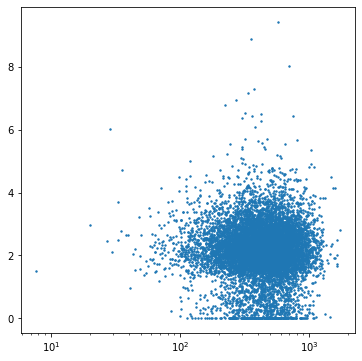

In [10]:
plt.figure(figsize=(6,6))
r = np.sqrt(dis.dataframe['vx[km/s]']**2+dis.dataframe['vy[km/s]']**2+dis.dataframe['vz[km/s]']**2)
plt.scatter(r,dis.dataframe['mass_g_dens'],s=2)
plt.xscale('log')

In [10]:
import numpy as np

In [11]:
a = np.array([1,2,3,4,0,6,0,6,6,6,0,0])

In [12]:
a

array([1, 2, 3, 4, 0, 6, 0, 6, 6, 6, 0, 0])

In [14]:
mask = a == 0

In [16]:
mask_a = np.ma.MaskedArray(a,mask)

In [18]:
mask_a.mean()

4.25

In [19]:
a.mean()

2.8333333333333335